In [65]:
import matplotlib.pyplot as plt
import numpy as np

In [66]:
R = 0.4
T =  [1, 2, 3, 7, 10]

rc = [0.0272, 0.0253, 0.0274, 0.0338, 0.0410] #Russia
rg = [0.0038, 0.00508, 0.00624, 0.00930, 0.00983] #USA

def proba(rg, rc, T, R = 0.4):
    return (1 - (1 + rg)**T / (1 + rc) ** T) / (1 - R)

p = [proba(rg[i], rc[i], T[i]) for i in range(len(T))]

L0 = np.log(1 / (1 - p[0]))
L12 = np.log((1 - p[0])/(1 - p[1]))
L23 = np.log((1 - p[1])/(1 - p[2]))
L37 = np.log((1 - p[2])/(1 - p[3])) / 4
L710 = np.log((1 - p[3])/(1 - p[4])) / 3

def S(T2):
    L = 0
    T1 = 0
    if (0 <= T2 < 1):
        return np.exp(-L0*T2)
    if (1 <= T2 < 2):
        L = L12
        T1 = 0
    if (2 <= T2 < 3):
        L = L23
        T1 = 1
    if (3 <= T2 < 7):
        L = L37
        T1 = 2
    if (7 <= T2 <= 10):
        L = L710
        T1 = 3
    return (1 - p[T1])*np.exp(-L*(T2 - T[T1]))



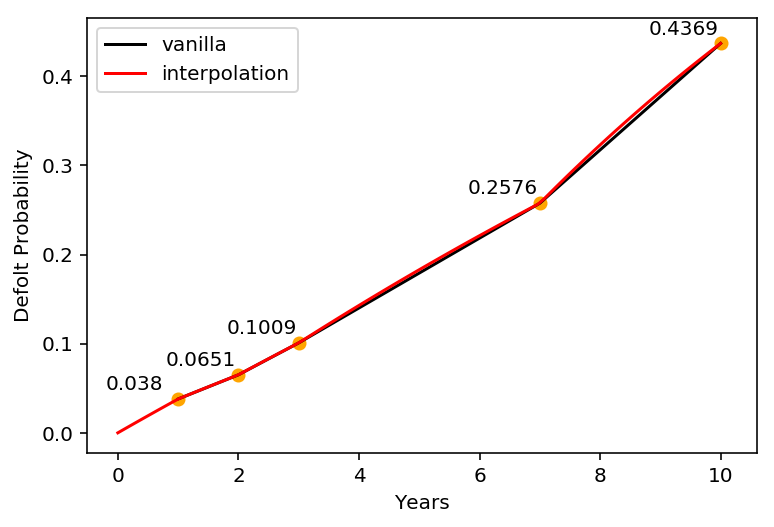

In [67]:
x1 = T
y1 = p

x2 = np.linspace(0,10, 100)
y2 = np.array([1 - S(i) for i in x2])

plt.plot(x1, y1, c = 'black', label = 'vanilla')
plt.plot(x2, y2, c = 'red', label = 'interpolation')
plt.scatter(x1, y1, c = 'orange')
for i in range(len(x1)):
    s = str(round(y1[i], 4))
    plt.annotate(s, (x1[i] - 1.2, y1[i]+0.01))
plt.ylabel("Defolt Probability")
plt.xlabel("Years")
plt.legend();

In [68]:
#точные значения вероятностей дефолта
p

[0.03796728971962593,
 0.06508865733992361,
 0.10087204273717713,
 0.2575888831692695,
 0.4368959706724834]

In [69]:
ss = 0.0
for i in range(1, 21):
    ss += S(i / 4.0)
x_opt_5 = 4.0 * (1.0 - R) * (1.0 - S(5)) / ss

In [70]:
#оптимальный x для пятилетнего свопа
x_opt_5

0.02419184423912517

In [71]:
ss = 0.0
for i in range(1, 41):
    ss += S(i / 4.0)
x_opt_10= 4.0 * (1.0 - R) * (1.0 - S(10)) / ss

In [72]:
#оптимальный x для десятилетнего свопа
x_opt_10

0.03272337862379151